In [ ]:
from sklearn.datasets import fetch_20newsgroups
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from keras.layers import Embedding, Dense, LSTM, GRU
from keras.models import Sequential
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import string

Using TensorFlow backend.


In [ ]:
categories = ['comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast']
# Prepare train and test data
data = fetch_20newsgroups(shuffle=True, subset='train', categories=categories)
test = fetch_20newsgroups(shuffle=True, subset='test', categories=categories)
news, news_topics, _classes = data.data, data.target, data.target_names

In [ ]:
# Tokenize the sentences into words (2000)
words = 10000
tokenizer = Tokenizer(num_words=words)
tokenizer.fit_on_texts(news)
sequences = Tokenizer.texts_to_sequences(tokenizer, news)

In [ ]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
max_length = 1000
X = pad_sequences(sequences, maxlen=max_length)
Y = keras.utils.to_categorical(news_topics)

print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', Y.shape)

Found 55199 unique tokens.
Shape of data tensor: (4059, 1000)
Shape of label tensor: (4059, 7)


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2)
len(word_index)

55199

In [ ]:
embedding_length = 64
model = Sequential()
model.add(LSTM(100, return_sequences=True,input_shape=(1, max_length)))
model.add(LSTM(100, dropout_W=0.25))
model.add(Dense(7, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(100, dropout=0.25)`
  after removing the cwd from sys.path.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 100)            440400    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 707       
Total params: 521,507
Trainable params: 521,507
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((3247, 1000), (3247, 7), (812, 1000), (812, 7))

In [ ]:
import numpy as np
X_train = np.reshape(X_train, (X_train.shape[0], 1 , X_train.shape[1]))
X_valid = np.reshape(X_valid, (X_valid.shape[0], 1, X_valid.shape[1]))
# ytrain = np.reshape(ytrain, (ytrain.shape[0], , ytrain.shape[1]))
# yvalid = np.reshape(yvalid, (yvalid.shape[0], 1, yvalid.shape[1]))

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((3247, 1, 1000), (3247, 7), (812, 1, 1000), (812, 7))

In [ ]:
history=model.fit(X_train, y_train, epochs=20,verbose=True, validation_data=(X_valid,y_valid), batch_size=64)

Train on 3247 samples, validate on 812 samples
Epoch 1/20
3247/3247 [==============================] - 2s 477us/step - loss: 0.4099 - accuracy: 0.8571 - val_loss: 0.4082 - val_accuracy: 0.8571
Epoch 2/20
3247/3247 [==============================] - 1s 235us/step - loss: 0.4055 - accuracy: 0.8571 - val_loss: 0.4042 - val_accuracy: 0.8571
Epoch 3/20
3247/3247 [==============================] - 1s 233us/step - loss: 0.3998 - accuracy: 0.8571 - val_loss: 0.3978 - val_accuracy: 0.8571
Epoch 4/20
3247/3247 [==============================] - 1s 232us/step - loss: 0.3966 - accuracy: 0.8571 - val_loss: 0.3972 - val_accuracy: 0.8571
Epoch 5/20
3247/3247 [==============================] - 1s 239us/step - loss: 0.3934 - accuracy: 0.8572 - val_loss: 0.3949 - val_accuracy: 0.8571
Epoch 6/20
3247/3247 [==============================] - 1s 229us/step - loss: 0.3928 - accuracy: 0.8571 - val_loss: 0.3968 - val_accuracy: 0.8571
Epoch 7/20
3247/3247 [==============================] - 1s 228us/step - loss:

In [ ]:
Loss,Accuracy = model.evaluate(X_valid, y_valid)
print("Loss :", Loss)
print("Accuracy:",Accuracy)

812/812 [==============================] - 0s 88us/step
Loss : 0.3943132919630981
Accuracy: 0.8567910194396973


In [ ]:
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(X, Y, test_size=0.2)
X_train1.shape, y_train1.shape, X_valid1.shape, y_valid1.shape

((3247, 1000), (3247, 7), (812, 1000), (812, 7))

In [ ]:
model1 = Sequential()
# # add embedding layer
model1.add(Embedding(len(word_index), embedding_length, input_length=max_length))
model1.add(LSTM(100, dropout_W=0.25))
model1.add(Dense(7, activation='softmax'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(100, dropout=0.25)`
  after removing the cwd from sys.path.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 64)          3532736   
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 707       
Total params: 3,599,443
Trainable params: 3,599,443
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history1=model1.fit(X_train1, y_train1, epochs=20,verbose=True, validation_data=(X_valid1,y_valid1), batch_size=64)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3247 samples, validate on 812 samples
Epoch 1/20
3247/3247 [==============================] - 76s 23ms/step - loss: 0.3954 - accuracy: 0.8573 - val_loss: 0.3531 - val_accuracy: 0.8628
Epoch 2/20
3247/3247 [==============================] - 75s 23ms/step - loss: 0.3109 - accuracy: 0.8665 - val_loss: 0.2987 - val_accuracy: 0.8753
Epoch 3/20
3247/3247 [==============================] - 75s 23ms/step - loss: 0.2268 - accuracy: 0.9009 - val_loss: 0.2072 - val_accuracy: 0.9127
Epoch 4/20
3247/3247 [==============================] - 75s 23ms/step - loss: 0.1277 - accuracy: 0.9522 - val_loss: 0.1440 - val_accuracy: 0.9467
Epoch 5/20
3247/3247 [==============================] - 76s 23ms/step - loss: 0.1086 - accuracy: 0.9611 - val_loss: 0.2078 - val_accuracy: 0.9189
Epoch 6/20
3247/3247 [==============================] - 75s 23ms/step - loss: 0.0894 - accuracy: 0.9694 - val_loss: 0.1436 - val_accuracy: 0.9456
Epoch 7/20
3247/3247 [==============================] - 76s 23ms/step - loss:

In [ ]:
Loss,Accuracy = model1.evaluate(X_valid1, y_valid1)
print("Loss :", Loss)
print("Accuracy:",Accuracy)

812/812 [==============================] - 5s 6ms/step
Loss : 0.6601728653085643
Accuracy: 0.8728008270263672


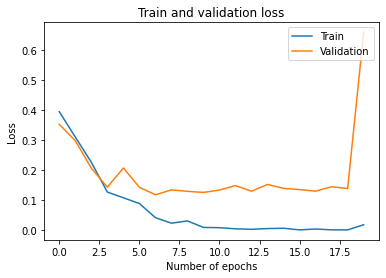

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Train and validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()